# Assignment Description

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    - Choose one variable and plot that variable four different ways.
    - Choose two continuous variables, and plot them three different ways.
    - Choose one continuous variable and one categorical variable, and plot them six different ways.
    - Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    - Probability distributions
    - Bivariate relationships
    - Whether the distributions or the relationships vary across groups
    - Accompany your plot with a written description of what you see.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load and preview data
nba_stats = pd.read_csv('/Users/Lisa/Thinkful_Data_Science_Projects/Module 13/Seasons_Stats.csv')
nba_stats.head()

# Filter and preview data for 2017 season
nba_2017 = nba_stats.loc[nba_stats['Year'] == 2017]
nba_2017.head()

# Drop all duplicates for 2017 and preview data
# This step removed players who switched teams midseason
nba_clean = nba_2017.drop_duplicates('Player', keep=False)
nba_clean.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24096,24096,2017.0,Alex Abrines,SG,23.0,OKC,68.0,6.0,1055.0,10.1,...,0.898,18.0,68.0,86.0,40.0,37.0,8.0,33.0,114.0,406.0
24100,24100,2017.0,Steven Adams,C,23.0,OKC,80.0,80.0,2389.0,16.5,...,0.611,282.0,333.0,615.0,86.0,88.0,78.0,146.0,195.0,905.0
24101,24101,2017.0,Arron Afflalo,SG,31.0,SAC,61.0,45.0,1580.0,9.0,...,0.892,9.0,116.0,125.0,78.0,21.0,7.0,42.0,104.0,515.0
24102,24102,2017.0,Alexis Ajinca,C,28.0,NOP,39.0,15.0,584.0,12.9,...,0.725,46.0,131.0,177.0,12.0,20.0,22.0,31.0,77.0,207.0
24103,24103,2017.0,Cole Aldrich,C,28.0,MIN,62.0,0.0,531.0,12.7,...,0.682,51.0,107.0,158.0,25.0,25.0,23.0,17.0,85.0,105.0


# Choose one variable and plot that variable four different ways

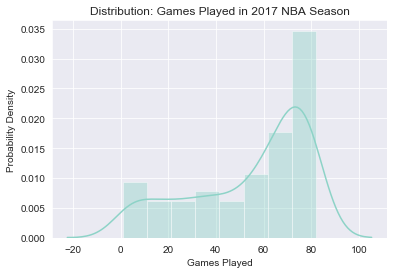

In [3]:
# 1 - Histogram with default settings
sns.distplot(nba_clean['G'])

plt.xlabel('Games Played')
plt.ylabel('Probability Density')
plt.title('Distribution: Games Played in 2017 NBA Season')

plt.show()

Pros: clearly shows shape of distribution

Cons: y-axis is difficult to interpret, estimate line is a bit distracting and makes the x-axis wider than necessary (negative games played doesn't make sense)

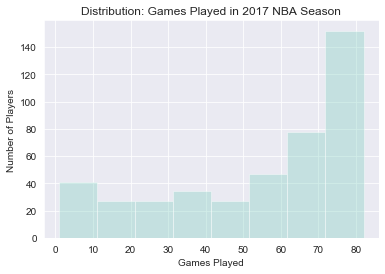

In [4]:
# Choose one variable and plot that variable four different ways
# 2 - Histogram with counts and default bins
sns.distplot(nba_clean['G'],
             norm_hist=False,
             kde=False)

plt.xlabel('Games Played')
plt.ylabel('Number of Players')
plt.title('Distribution: Games Played in 2017 NBA Season')

plt.show()

Pros: distribution is clear, y-axis is easy to interpret, x-axis has the appropriate limits

Cons: bins don't perfectly match up with axis labels, perhaps too few bins

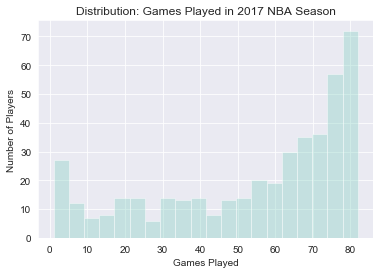

In [5]:
# 3 - Histogram with counts and manual bins
sns.distplot(nba_clean['G'],
             bins=20,
             norm_hist=False,
             kde=False)

plt.xlabel('Games Played')
plt.ylabel('Number of Players')
plt.title('Distribution: Games Played in 2017 NBA Season')

plt.show()

Pros: distribution is clear, y-axis is easy to interpret, x-axis has the appropriate limits

Cons: bins don't perfectly match up with axis labels, perhaps too many bins

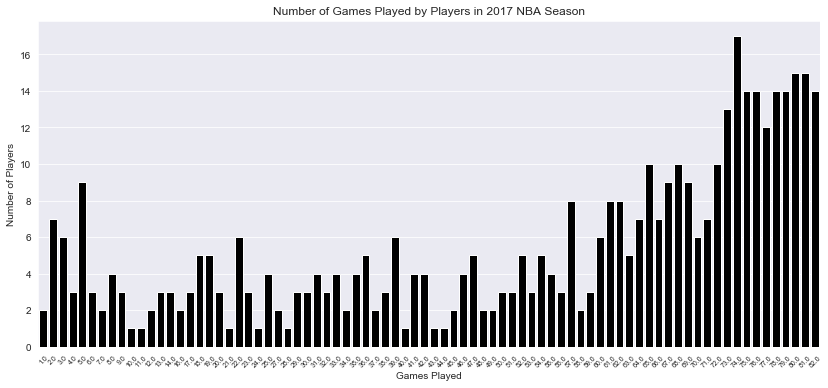

In [6]:
# 4 - Bar plot
# Same as distplot with bins set to 82
plt.figure(figsize=(14,6))

sns.countplot(x='G',
              data=nba_clean,
              color='black')

plt.xlabel('Games Played')
plt.ylabel('Number of Players')
plt.xticks(rotation=45,
           fontsize=7)
plt.title('Number of Games Played by Players in 2017 NBA Season')
plt.show()

Pros: easy to interpret, x-axis has the appropriate limits

Cons: x-axis is too cluttered and difficult to read (would be better to label every 5)

# Choose two continuous variables, and plot them three different ways


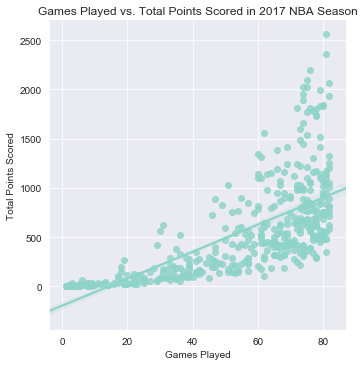

In [7]:
# 1 - Scatter plot of games played vs. points
ax1 = sns.lmplot(x='G',
           y='PTS',
           data=nba_clean)

ax1.set_axis_labels('Games Played', 'Total Points Scored')
plt.title('Games Played vs. Total Points Scored in 2017 NBA Season')

plt.show()

Pros: relationship between variables is pretty clear

Cons: difficult to determine the density of points at some places, linear regression is unnecessary (does not fit the data, not meaningful), axes limits could be optimized a little bit

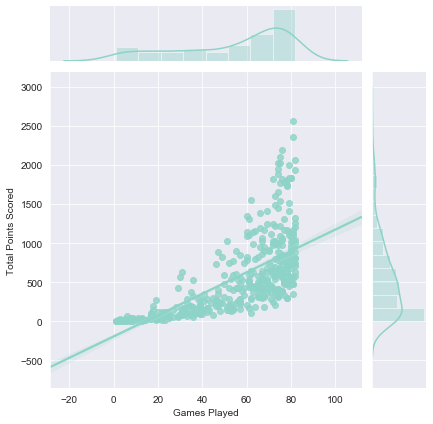

In [8]:
# 2 - Jointplot of games played vs. points
ax2 = sns.jointplot(x='G',
              y='PTS',
              data=nba_clean,
              kind='reg') # Add regression and kernel density fits

ax2.set_axis_labels('Games Played', 'Total Points Scored')

plt.show()

Pros: relationship between variables is pretty clear, histograms help show the density/distribution of points

Cons: linear regression is unnecessary (does not fit the data, not meaningful), axes limits could be optimized quite a bit

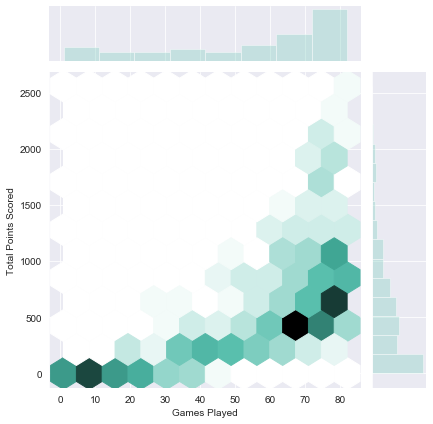

In [9]:
# 3 - Jointplot of games played vs. points
ax3 = sns.jointplot(x='G',
              y='PTS',
              data=nba_clean,
              kind='hex') # Replace scatterplot with a joint histogram using hexagonal bins

ax3.set_axis_labels('Games Played', 'Total Points Scored')

plt.show()

Pros: clarifies the density/distribution of points even more, appropriate axes limits

Cons: unique way to display information (not as intuitive, takes time to interpret), no color scale

# 

# Choose one continuous variable and one categorical variable, and plot them six different ways

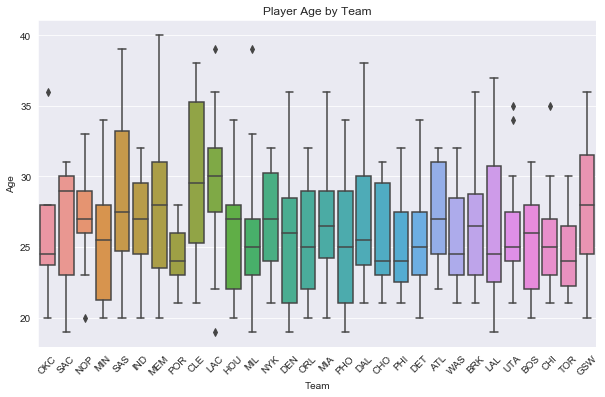

In [10]:
# 1 - Boxplot of age by team
plt.figure(figsize=(10,6))

sns.boxplot(x='Tm',
            y='Age',
            data=nba_clean)

plt.xlabel('Team')
plt.xticks(rotation=45)
plt.title('Player Age by Team')

plt.show()

Pros: very clear and easy to interpret, overall/summary distribution is clear, shows spread of data

Cons: color is not very helpful, finer/full distribution not visible

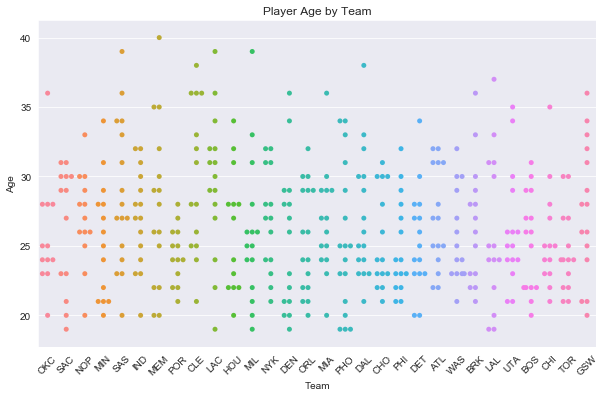

In [11]:
# 2 - Swarmplot of age by team
plt.figure(figsize=(10,6))

sns.swarmplot(x='Tm',
            y='Age',
            data=nba_clean)

plt.xlabel('Team')
plt.xticks(rotation=45)
plt.title('Player Age by Team')

plt.show()

Pros: finer/full distribution is somewhat clear (how many players at each age)

Cons: more difficult to interpret, boundaries between teams are unclear, summary distribution not visible

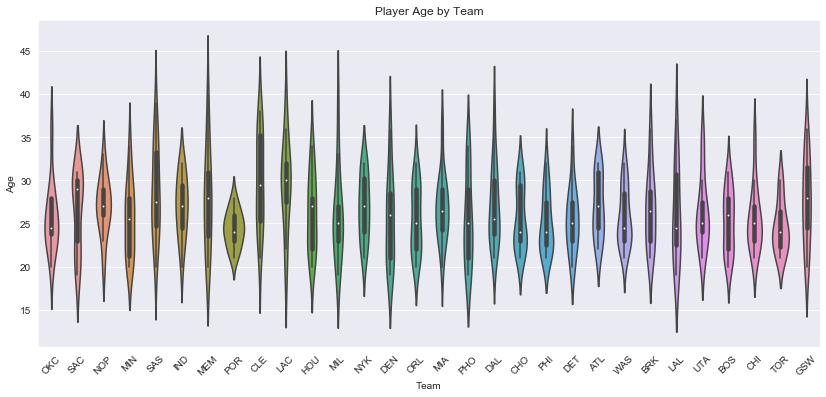

In [12]:
# 3 - Violinplot of age by team
plt.figure(figsize=(14,6))

sns.violinplot(x='Tm',
            y='Age',
            data=nba_clean)

plt.xlabel('Team')
plt.xticks(rotation=45)
plt.title('Player Age by Team')

plt.show()

Pros: relatively easy to interpret, overall/summary distribution is clear, begin to get some information about the finer/full distribution

Cons: inner boxplots are difficult to see

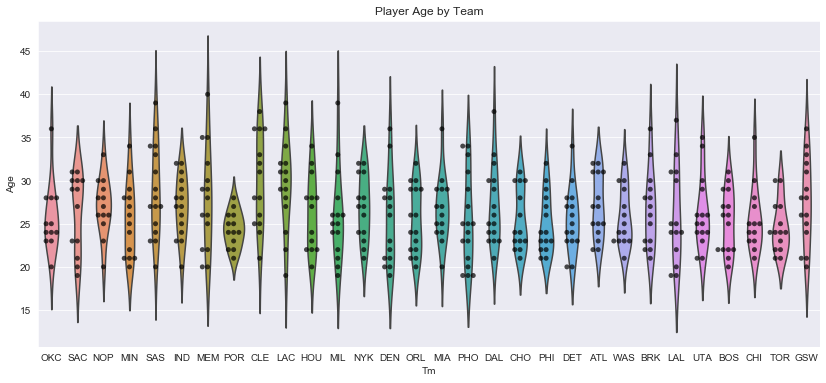

In [13]:
# 4 - Combine swarmplot and violin plot
# Set figure size with matplotlib
plt.figure(figsize=(14,6))

# Create plots
sns.violinplot(x='Tm',
            y='Age',
            data=nba_clean,
            inner=None) # Remove bars inside violins
            
sns.swarmplot(x='Tm',
              y='Age',
              data=nba_clean,
              color='k', # Make points black
              alpha=0.7) # Make points slightly transparent

plt.title('Player Age by Team')
plt.show()

Pros: best of the boxplot and violinplot, easy to interpret, overall/summary distribution is pretty clear, finer/full distribution is clear

Cons: mean/median not shown, color not super meaningful, could be more informative by ordering by conference (eastern or western) or average age

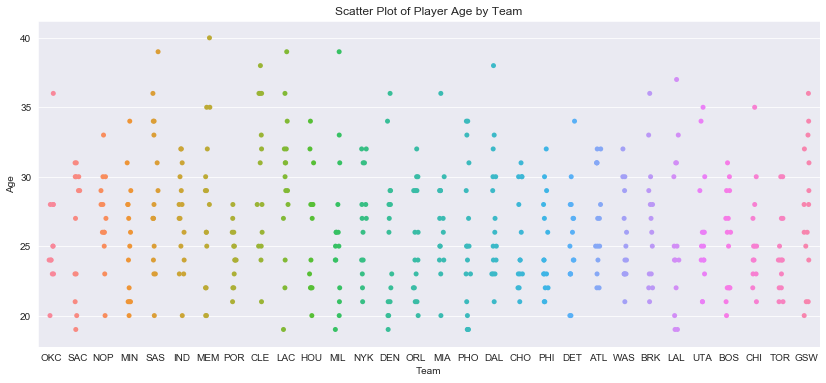

In [14]:
# 5 - Stripplot of age by team
plt.figure(figsize=(14,6))

sns.stripplot(x='Tm',
              y='Age',
              data=nba_clean)
plt.xlabel('Team')
plt.title('Scatter Plot of Player Age by Team')
plt.show()

Pros: spread of data is clear, finer/full distribution is somewhat clear (how many players at each age)

Cons: more difficult to interpret, boundaries between teams are unclear, summary distribution not visible, individual points are not resolved

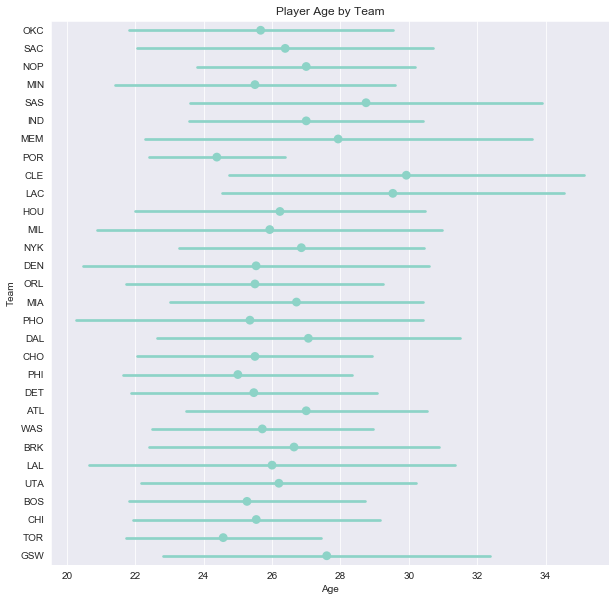

In [15]:
# 6 - Pointplot of age by team
plt.figure(figsize=(10,10))

sns.pointplot(x='Age',
              y='Tm',
              data=nba_clean,
              join=False, # Remove lines between team point estimates
              ci='sd') # Standard deviation of age

plt.ylabel('Team')

plt.title('Player Age by Team')
plt.show()

Pros: easy to interpret, just the right amount of information, simple colors, easy to compare mean age between teams, easy to pick out unique trends (such as POR being a very young team)

Cons: unclear what the points and tails represent, finer distribution is not shown

# Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    - Probability distributions
    - Bivariate relationships
    - Whether the distributions or the relationships vary across groups
    - Accompany your plot with a written description of what you see.

In [16]:
# Filter data for 1997 season
nba_1997 = nba_stats.loc[nba_stats['Year'] == 1997]

# Filter data for 2017 season
nba_2017 = nba_stats.loc[nba_stats['Year'] == 2017]

# Drop all duplicates for both seasons and preview data
# This step removed players who switched teams midseason
clean_1997 = nba_1997.drop_duplicates('Player', keep=False)
clean_2017 = nba_2017.drop_duplicates('Player', keep=False)

# Append 2017 dataframe to 1997 dataframe to make one final dataframe
clean_two = clean_1997.append(clean_2017)

# Filter to include only columns of interest
final_df = clean_two[['Year', 'Player', 'Tm', 'Age', 'TRB', 'AST', 'STL', 'PTS']]

final_df.head()

,Year,Player,Tm,Age,TRB,AST,STL,PTS
12839,1997.0,Mahmoud Abdul-Rauf,SAC,27.0,122.0,189.0,56.0,1031.0
12840,1997.0,Shareef Abdur-Rahim,VAN,20.0,555.0,175.0,79.0,1494.0
12841,1997.0,Rafael Addison,CHH,32.0,45.0,34.0,8.0,128.0
12842,1997.0,Cory Alexander,SAS,23.0,123.0,254.0,82.0,577.0
12846,1997.0,Ray Allen,MIL,21.0,326.0,210.0,75.0,1102.0


In [17]:
# Look at relationship between Age, AST, STL, PTS, and season (1997 vs. 2017)
# Melt dataframe
melted_df = pd.melt(final_df,
                    id_vars=['Year', 'Player', 'Tm', 'Age'], # Variables to keep
                    var_name='Stats') # Name of melted variable
melted_df.head()

,Year,Player,Tm,Age,Stats,value
0,1997.0,Mahmoud Abdul-Rauf,SAC,27.0,TRB,122.0
1,1997.0,Shareef Abdur-Rahim,VAN,20.0,TRB,555.0
2,1997.0,Rafael Addison,CHH,32.0,TRB,45.0
3,1997.0,Cory Alexander,SAS,23.0,TRB,123.0
4,1997.0,Ray Allen,MIL,21.0,TRB,326.0


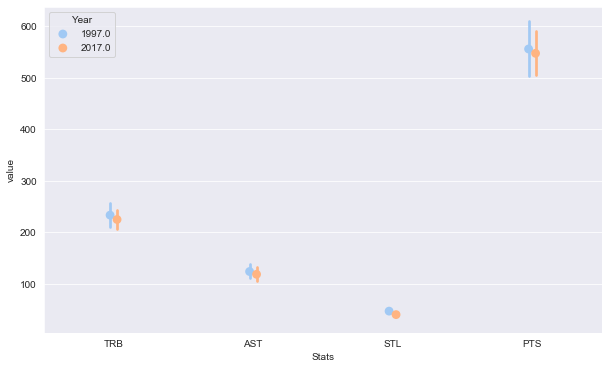

In [18]:
# Pointplot with melted_df
plt.figure(figsize=(10,6))

sns.pointplot(x='Stats',
              y='value',
              hue='Year',
              data=melted_df,
              height=6,
              kind='strip',
              palette='pastel',
              ci=95,
              dodge=True,
              join=False)

plt.show()

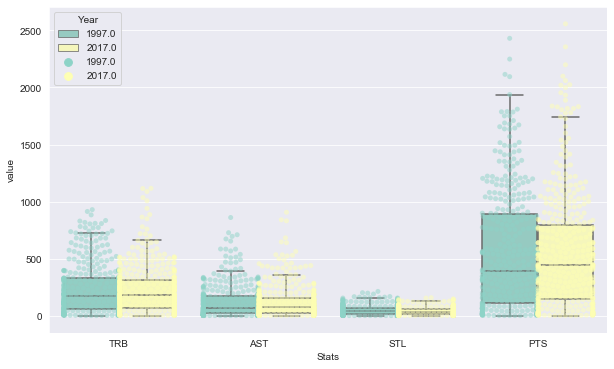

In [22]:
# Boxplot and swarmplot with melted_df
plt.figure(figsize=(10,6))

sns.boxplot(x='Stats',
              y='value',
              data=melted_df,
              hue='Year',
              dodge=True,
              showfliers=False)

sns.swarmplot(x='Stats',
              y='value',
              data=melted_df,
              hue='Year',
              alpha=0.5,
              dodge=True)

plt.show()

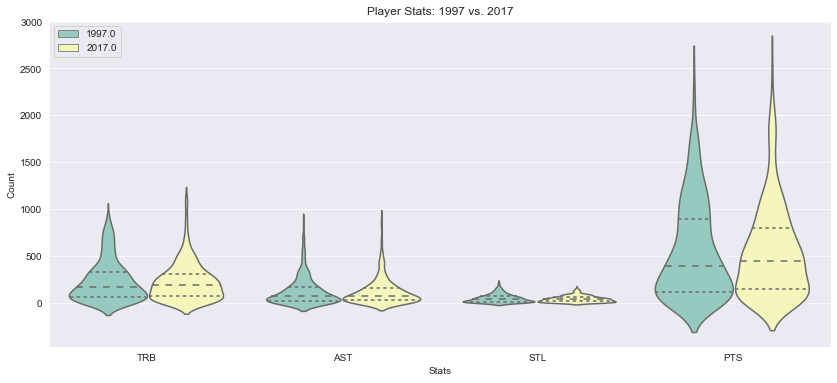

In [31]:
# Violinplot with melted_df
plt.figure(figsize=(14,6))

sns.violinplot(x='Stats',
              y='value',
              data=melted_df,
              hue='Year',
              inner='quartile',
              dodge=True)

plt.ylabel('Count')
plt.title('Player Stats: 1997 vs. 2017')
plt.legend(loc='upper left')

plt.show()

Although the median number of total rebounds and points goes up slightly from 1997 to 2017, the overall distributions for all four stat categories are very similar. For total rebounds, players in 2017 seemed to be a little more clustered around the median whereas in 1997 there were more players at the higher end of the distribution. For assists, the summary values and distributions are nearly identical. For steals, the distribution in 2017 seems slightly narrower/shorter than that in 1997, suggesting fewer defensive specialists who excel in steals. Finally, for points, the distributions are quite similar, but there is a noticeable widening in the 500 to 1000 range and a narrowing in the 1000 to 1750 range of the 2017 distribution, suggesting an increase in the number of players scoring just above the median but a decrease in the number of players scoring much more than that. Overall, these trends seem to fit with how the NBA has changed over the last 20 years, with fewer rebound-heavy forwards/centers and more team rebounding, as well as higher scoring games with perhaps a slighlty more well-rounded scoring effort.